## Get some ML model going
## Start with loading cleansed data

In [170]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [171]:
data=pd.read_csv('AmesHousingALL_cln.csv')
price=np.load('Sale_Price.npy')

In [172]:
#drop all unamed:
data=data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])

In [173]:
# take out SalePrice column
data=data.drop(columns=['SalePrice'])
y=price
print(data.shape)
print(price.shape)

(2930, 82)
(2930,)


In [174]:
# train-test split
train_X=data[0:1200]
train_y=price[0:1200]
test_X=data[1201:len(data)]
test_y=price[1201:len(price)]

In [175]:
train_X.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,Bsmt Bath,Total House SF,Total Bath
0,20,4,141.0,31770,1,1,0,3,4,0,...,4,0,0,5,2010,0,3,0.50,3449.0,2.0
1,20,7,80.0,11622,1,1,3,3,4,4,...,2,0,0,6,2010,0,3,0.00,2188.0,1.0
2,20,4,81.0,14267,1,1,0,3,4,0,...,4,1,12500,6,2010,0,3,0.00,3493.0,2.0
3,20,4,93.0,11160,1,1,3,3,4,0,...,4,0,0,4,2010,0,3,0.25,5265.0,4.0
4,60,4,74.0,13830,1,1,0,3,4,4,...,2,0,0,3,2010,0,3,0.00,2940.0,3.0


In [10]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, optional, default True
 |      If True, X will be copied; else, it may be overwritten.
 | 

In [177]:
regr0 = linear_model.LinearRegression()

In [178]:
# plug in the data to do a first fit
regr0.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [179]:
p_prc_train=regr0.predict(train_X) # do some predicition

/NFS/home/home1/twang12/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/NFS/home/home1/twang12/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


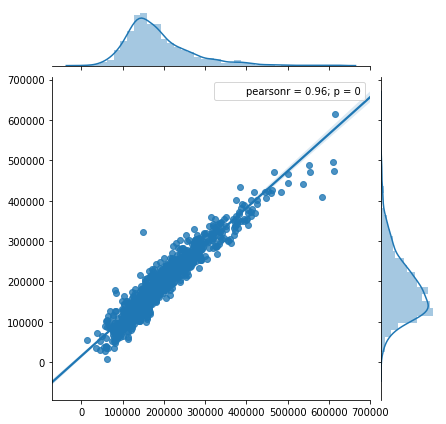

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.jointplot(x=train_y, y=p_prc_train, data=data, kind="reg");
plt.show()

In [181]:
print((train_y-p_prc_train).sum())  
### *******This is quite shocking that he regression model predicts exactly the same value???
### it is not doing any prediction???

-7.63684511185e-08


In [182]:
p_prc_test=regr0.predict(test_X) # do some predicition

In [183]:
weights=zip(list(data.columns),regr0.coef_) # use a iterable to print the coefficient and their corresponding column name
for cols, coef in weights:
    print(cols,':',coef)

MS SubClass : -69.7037317262
MS Zoning : -2411.56244984
Lot Frontage : 51.2070590966
Lot Area : 0.609708504315
Street : 6702.56770519
Alley : 2387.55259437
Lot Shape : -83.8122666321
Land Contour : -1549.0890972
Utilities : 15392.0437792
Lot Config : 415.410693446
Land Slope : 4530.74425942
Neighborhood : 56.5636384884
Condition 1 : -1176.01623777
Condition 2 : 11038.3956258
Bldg Type : -1035.59590361
House Style : 4036.27478387
Overall Qual : 7767.68028301
Overall Cond : 7056.40679884
Year Built : 433.871825812
Year Remod/Add : -88.5684832109
Roof Style : 952.483367856
Roof Matl : -3566.66037501
Exterior 1st : 157.271415052
Exterior 2nd : -241.486865721
Mas Vnr Type : 6419.82507621
Mas Vnr Area : 42.5839585159
Exter Qual : 10135.4355535
Exter Cond : -2059.06483584
Foundation : 290.572556941
Bsmt Qual : 8389.89138653
Bsmt Cond : -6109.83128509
Bsmt Exposure : 1780.41342172
BsmtFin Type 1 : -1247.91177081
BsmtFin SF 1 : 54.7931149016
BsmtFin Type 2 : 130.986519561
BsmtFin SF 2 : 39.8300

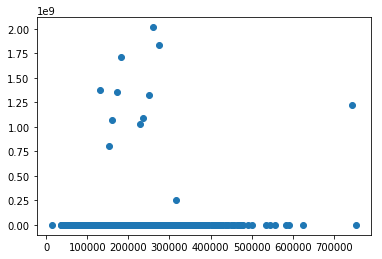

In [113]:
plt.scatter(test_y,p_prc_test)
plt.show()

In [184]:
print((test_y-p_prc_test).sum())  

2617349.62693


In [185]:
# Try the Random Forest model
from sklearn.ensemble import RandomForestRegressor
RF_regr = RandomForestRegressor(random_state=1)

In [186]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble.forest:

class RandomForestRegressor(ForestRegressor)
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and use averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |  criterion : string, optional (default="mse")
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion, and "mae" for the mean
 |      absolute 

In [187]:
RF_regr.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [188]:
pRF_prc_train=RF_regr.predict(train_X) # do some predicition

/NFS/home/home1/twang12/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/NFS/home/home1/twang12/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


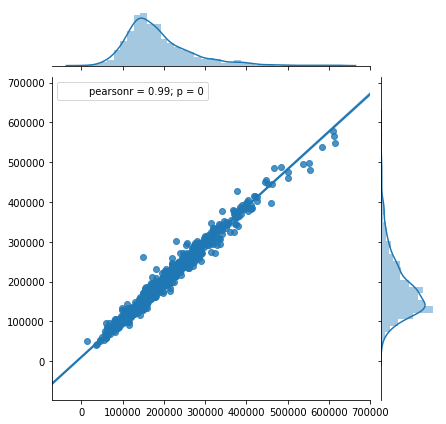

In [189]:
sns.jointplot(x=train_y, y=pRF_prc_train, data=data, kind="reg");
plt.show()

In [190]:
pRF_prc_test=RF_regr.predict(test_X) # do some predicition

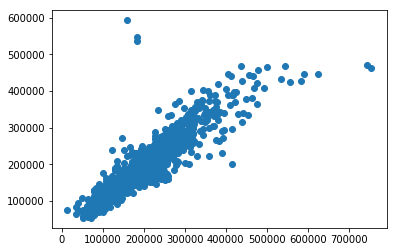

In [191]:
plt.scatter(test_y,pRF_prc_test)
plt.show()

In [192]:
# select subset data that contains one neighborhood
NAmes_df=data.loc[data['Neighborhood']==17]

In [193]:
NAmes_df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,Bsmt Bath,Total House SF,Total Bath
19,20,4,85.0,13175,1,1,3,3,4,4,...,2,0,0,2,2010,0,3,0.333333,4553.0,3.0
20,20,4,105.0,11751,1,1,0,3,4,4,...,2,0,0,1,2010,5,3,0.000000,4949.0,2.0
21,85,4,85.0,10625,1,1,3,3,4,4,...,2,0,0,1,2010,0,2,0.333333,2346.0,3.0
110,20,4,0.0,10456,1,1,0,3,4,4,...,4,0,0,5,2010,0,3,0.333333,5057.0,3.0
111,60,4,80.0,10791,1,1,3,3,4,4,...,4,0,0,3,2010,0,3,0.250000,4174.0,4.0


In [194]:
ind=NAmes_df.index

In [196]:
#fetch the price of house based on index
NAmes_prc=price[ind]

In [153]:
#observe some distribution of the attributes
for col in NAmes_df.columns:
    print(NAmes_df[col].describe())

count    131.000000
mean      44.923664
std       27.167463
min       20.000000
25%       20.000000
50%       60.000000
75%       60.000000
max      190.000000
Name: MS SubClass, dtype: float64
count    131.0
mean       4.0
std        0.0
min        4.0
25%        4.0
50%        4.0
75%        4.0
max        4.0
Name: MS Zoning, dtype: float64
count    131.000000
mean      52.893130
std       40.263794
min        0.000000
25%        0.000000
50%       78.000000
75%       80.000000
max      130.000000
Name: Lot Frontage, dtype: float64
count      131.000000
mean     11661.694656
std       2480.699358
min       8000.000000
25%      10140.000000
50%      10928.000000
75%      12386.000000
max      20781.000000
Name: Lot Area, dtype: float64
count    131.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Street, dtype: float64
count    131.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.